# <font color='blue'> Project 1 - Classification
    
### Group Members:
#### Femina Martin Pereira - FXP190002
#### Divya Deepak Pai - DXP190009
    
### Dataset Source:
[Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimaraes, Portugal, October, 2011. EUROSIS (http://hdl.handle.net/1822/14838).
    
### Dataset Description:    
It is a Bank Marketing data set. The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed. 

The dataset has 4521 instances and 18 columns.

### Goal:
The classification goal is to predict if the client will subscribe a term deposit - yes or no (Column y).	
    
### Attributes Information:

### 1) Feature Set
### Bank Client Data Attributes:-
- ID (Client ID)
- age (numeric)
- job : type of job (categorical: 'admin.','unknown','unemployed','management','housemaid','entrepreneur','student',
'blue-collar','self-employed','retired','technician','services') 
- marital : marital status (categorical: 'married','divorced','single'; note: 'divorced' means divorced or widowed)
- education (categorical: 'unknown','secondary','primary','tertiary')
- default: has credit in default? (binary: 'yes','no')
- balance: average yearly balance, in euros (numeric) 
- housing: has housing loan? (binary: 'yes','no')
- loan: has personal loan? (binary: 'yes','no')

### Related with the last contact of the current campaign:-
- contact: contact communication type (categorical: 'unknown','telephone','cellular') 
- day: last contact day of the month (numeric)
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- duration: last contact duration, in seconds (numeric)

### Other Attributes:-
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'unknown','other','failure','success')

### 2) Target Value
- y: has the client subscribed a term deposit? (binary: 'yes','no')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Importing the Original Dataset with no missing values

In [2]:
df = pd.read_csv('C:\\Users\\user\\Desktop\\FALL 2020 COURSES\\APPLIED MACHINE LEARNING (MON)\\PROJECT 1\\bank_marketing.csv')

In [3]:
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,5,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,4517,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,4518,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,4519,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,4520,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


### Remove the insignificant columns from the dataframe

In [4]:
df.drop('ID', axis = 1, inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 423.9+ KB


In [6]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


### Since the dataset is complete, we randomly insert 5-10% NaN values.

In [7]:
df = pd.read_csv('C:\\Users\\user\\Desktop\\FALL 2020 COURSES\\APPLIED MACHINE LEARNING (MON)\\PROJECT 1\\bank_marketing_missing.csv')

In [8]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,30.0,NaN,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,2,33.0,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,3,35.0,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,4,30.0,management,NaN,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,5,59.0,blue-collar,NaN,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [9]:
df.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,4517,33.0,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,4518,57.0,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,4519,57.0,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,4520,28.0,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,4521,44.0,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


### Perform Train and Test splits

In [10]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, random_state = 0)

In [11]:
train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4384,4385,52.0,management,single,tertiary,no,4,no,yes,cellular,28,jul,30,9,-1,0,unknown,no
2560,2561,44.0,blue-collar,married,secondary,no,1071,yes,no,cellular,11,may,143,3,357,1,failure,no
1470,1471,NaN,blue-collar,married,primary,no,4103,no,no,cellular,19,nov,291,1,-1,0,unknown,no
1771,1772,37.0,management,married,tertiary,no,347,yes,no,cellular,22,jul,282,1,-1,0,unknown,no
2604,2605,57.0,management,married,unknown,no,0,no,no,cellular,30,NaN,585,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,1034,NaN,technician,single,secondary,no,534,yes,no,cellular,18,may,382,1,-1,0,unknown,no
3264,3265,36.0,management,single,tertiary,no,613,no,NaN,cellular,7,aug,86,2,-1,0,unknown,no
1653,1654,53.0,blue-collar,married,primary,no,306,no,no,cellular,28,jul,388,3,181,1,success,yes
2607,2608,32.0,blue-collar,married,NaN,no,642,no,yes,cellular,8,jul,524,1,-1,0,unknown,no


In [12]:
test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4274,4275,35.0,blue-collar,married,primary,no,378,yes,no,unknown,16,may,427,3,-1,0,unknown,no
72,73,31.0,management,NaN,tertiary,no,6248,yes,no,NaN,9,may,154,2,-1,0,unknown,no
1065,1066,30.0,unemployed,married,tertiary,no,0,yes,no,cellular,18,nov,756,1,-1,0,unknown,no
3185,3186,42.0,admin.,married,secondary,no,529,yes,yes,cellular,19,nov,193,3,-1,0,unknown,no
130,131,41.0,blue-collar,married,NaN,no,168,yes,no,cellular,18,nov,187,3,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,1791,NaN,technician,married,secondary,no,1477,yes,no,cellular,8,jul,355,1,-1,0,unknown,no
2106,2107,47.0,entrepreneur,married,primary,no,668,no,no,cellular,12,may,908,1,-1,0,unknown,no
242,243,44.0,management,married,tertiary,no,3762,no,no,cellular,28,aug,125,12,-1,0,unknown,no
4402,4403,41.0,NaN,married,primary,no,39,yes,no,cellular,21,NaN,549,2,-1,0,unknown,yes


### Explore the train data

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 4384 to 2732
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         3390 non-null   int64  
 1   age        2754 non-null   float64
 2   job        3216 non-null   object 
 3   marital    3270 non-null   object 
 4   education  3219 non-null   object 
 5   default    3390 non-null   object 
 6   balance    3390 non-null   int64  
 7   housing    3390 non-null   object 
 8   loan       3186 non-null   object 
 9   contact    3084 non-null   object 
 10  day        3390 non-null   int64  
 11  month      3144 non-null   object 
 12  duration   3390 non-null   int64  
 13  campaign   3390 non-null   int64  
 14  pdays      3390 non-null   int64  
 15  previous   3390 non-null   int64  
 16  poutcome   3390 non-null   object 
 17  y          3390 non-null   object 
dtypes: float64(1), int64(7), object(10)
memory usage: 370.8+ KB


### Remove the insignificant columns from the train set

In [14]:
train.drop('ID', axis = 1, inplace = True)

In [15]:
train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,2754.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
mean,41.244735,1432.131563,15.848083,260.278171,2.792625,40.054277,0.543363
std,10.883711,3070.844395,8.232079,252.128385,3.067703,100.755075,1.695039
min,19.000000,-2082.000000,1.000000,5.000000,1.000000,-1.000000,0.000000
25%,32.000000,72.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,40.000000,440.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,48.000000,1464.000000,21.000000,331.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


### List of columns that have missing values

In [16]:
train.columns[train.isnull().any()]

Index(['age', 'job', 'marital', 'education', 'loan', 'contact', 'month'], dtype='object')

### Exploratory Data Analysis

Let us explore some of the features that will be used in our machine learning algorithms. This will give us a better idea about the distribution of features as well as how to handle imputation of missing values in order to clean the data.

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

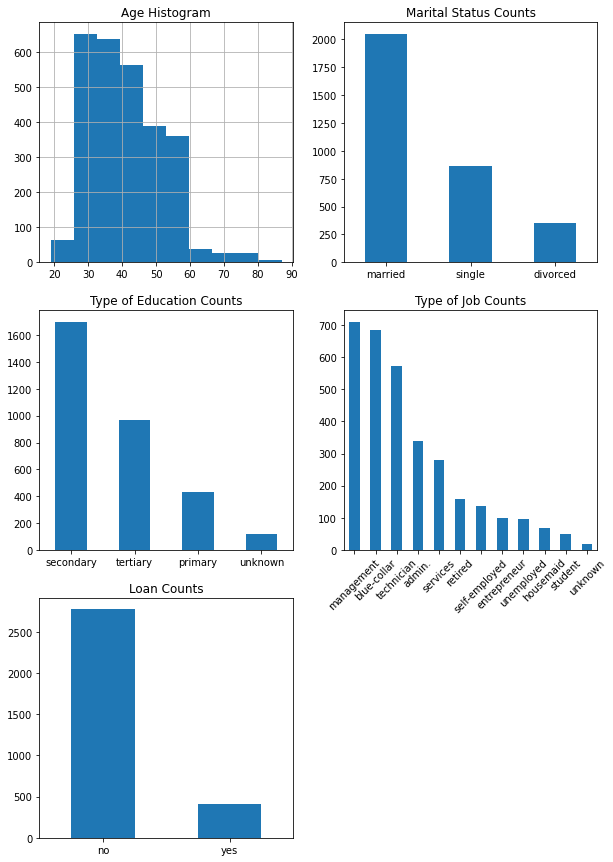

In [17]:
# Set up a grid of plots
# import pylab as plt1
# fig = plt1.figure(figsize=fizsize_with_subplots) 
plt.figure(figsize=(10,15)) 
fig_dims = (3, 2)

# Plot age histogram
plt.subplot2grid(fig_dims, (0,0))
train['age'].hist()
plt.title('Age Histogram')

# Plot marital status counts
plt.subplot2grid(fig_dims, (0, 1))
train['marital'].value_counts().plot(kind='bar', 
                                       title='Marital Status Counts')
plt.xticks(rotation=0)

# Plot Type of Education counts
plt.subplot2grid(fig_dims, (1, 0))
train['education'].value_counts().plot(kind='bar', 
                                    title='Type of Education Counts')
plt.xticks(rotation=0)

# Plot type of job counts
plt.subplot2grid(fig_dims, (1, 1))
train['job'].value_counts().plot(kind='bar', 
                                         title='Type of Job Counts')
plt.xticks(rotation=45)

# Plot loan counts
plt.subplot2grid(fig_dims, (2, 0))
train['loan'].value_counts().plot(kind='bar', 
                                         title='Loan Counts')
plt.xticks(rotation=0)

Let us look at the features - contact and month which tell us more about the last contact of the current campaign.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'may'),
  Text(1, 0, 'jul'),
  Text(2, 0, 'aug'),
  Text(3, 0, 'jun'),
  Text(4, 0, 'nov'),
  Text(5, 0, 'apr'),
  Text(6, 0, 'feb'),
  Text(7, 0, 'jan'),
  Text(8, 0, 'oct'),
  Text(9, 0, 'sep'),
  Text(10, 0, 'mar'),
  Text(11, 0, 'dec')])

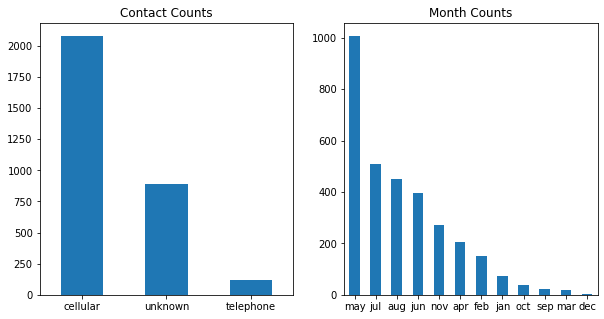

In [18]:
plt.figure(figsize=(10,5)) 
fig_dims = (1, 2)

# Plot contact counts
plt.subplot2grid(fig_dims, (0, 0))
train['contact'].value_counts().plot(kind='bar', 
                                         title='Contact Counts')
plt.xticks(rotation=0)

# Plot month counts
plt.subplot2grid(fig_dims, (0, 1))
train['month'].value_counts().plot(kind='bar', 
                                         title='Month Counts')
plt.xticks(rotation=0)

### Imputation of NaN values - Train data

### Feature: AGE

As we can see from the above plot that Age histogram is right-skewed. Thus, we will impute the NaN values in the AGE column by the median value of age.

In [19]:
train['age']= train['age'].fillna(train['age'].median())
train['age'] = train['age'].astype(int)

### Feature: MARITAL

As we can see that marital is a categorical variable with categories - married, divorced and single. Since, the category 'married' has the highest frequency, thus, we will impute the NaN values by 'married'.

In [20]:
train['marital'].replace(np.NaN, 'married', inplace = True)

### Feature: EDUCATION

Education is a categorical variable with categories - unknown, secondary, primary and tertiary. As we can see that the clients have attained secondary education mostly, thus, we replace the NaN values by the category 'secondary'. 

In [21]:
train['education'].replace(np.NaN, 'secondary', inplace = True)

### Feature: JOB

Job is a categorical variable with 12 categories- 'admin.','unknown','unemployed','management','housemaid','entrepreneur','student', 'blue-collar','self-employed','retired','technician','services'. The 2 highly frequent categories are management and blue-collar. We impute the NaN values by the mode value, that is highly frequent category, thus by 'management'.

In [22]:
train['job'].replace(np.NaN, 'management', inplace = True)

### Feature: LOAN

Loan is a binary variable with values yes or no. Since, a majority of clients did not have a personal loan, we will impute the NaN values by 'no'.

In [23]:
train['loan'].replace(np.NaN, 'no', inplace = True)

### Feature: CONTACT

Contact is a categorical variable with categories- unknown, cellular and telephone. Since, the contact type 'cellular' is highly frequent in the dataset, we replace the NaN values by 'cellular'.

In [24]:
train['contact'].replace(np.NaN, 'cellular', inplace = True)

### Feature: MONTH

Month is again a categorical variable with values - jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov and dec. Since, most of the last contacts were made in the month of may, we replace the NaN values by 'may'.

In [25]:
train['month'].replace(np.NaN, 'may', inplace = True)

We have imputed all the missing values with either mean or median or mode of the columns. Thus, the data is now complete with no NaN values.

In [26]:
train.columns[train.isnull().any()]

Index([], dtype='object')

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 4384 to 2732
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        3390 non-null   int32 
 1   job        3390 non-null   object
 2   marital    3390 non-null   object
 3   education  3390 non-null   object
 4   default    3390 non-null   object
 5   balance    3390 non-null   int64 
 6   housing    3390 non-null   object
 7   loan       3390 non-null   object
 8   contact    3390 non-null   object
 9   day        3390 non-null   int64 
 10  month      3390 non-null   object
 11  duration   3390 non-null   int64 
 12  campaign   3390 non-null   int64 
 13  pdays      3390 non-null   int64 
 14  previous   3390 non-null   int64 
 15  poutcome   3390 non-null   object
 16  y          3390 non-null   object
dtypes: int32(1), int64(6), object(10)
memory usage: 331.1+ KB


In [28]:
train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
mean,41.011209,1432.131563,15.848083,260.278171,2.792625,40.054277,0.543363
std,9.821475,3070.844395,8.232079,252.128385,3.067703,100.755075,1.695039
min,19.000000,-2082.000000,1.000000,5.000000,1.000000,-1.000000,0.000000
25%,35.000000,72.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,40.000000,440.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,46.000000,1464.000000,21.000000,331.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


### Data Transformation - Train data 

Let us go through each categorical/ordinal/binary columns and perform data transformation by either mapping or one hot vector encoding. Columns 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome' and 'y' are of data type object. Also, column 'day' is not an object, it is an integer value from 1 to 31, but it requires data transformation as it is not a numeric value that can be added or subtracted, it represents the dates in a month.

Data Transformation on column JOB : one hot vector of length 12

In [29]:
cols = pd.get_dummies(train['job'], prefix= 'job')
train[cols.columns] = cols
train.drop('job', axis = 1, inplace = True)

Data Transformation on column MARITAL : one hot vector of length 3

In [30]:
cols = pd.get_dummies(train['marital'], prefix= 'marital')
train[cols.columns] = cols
train.drop('marital', axis = 1, inplace = True)

Data Transformation on column EDUCATION : 0 to 3

In [31]:
train['education'] = train['education'].map({'unknown':0, 'primary':1, 'secondary':2, 'tertiary':3}).astype(int)

Data Transformation on column DEFAULT : We will plot 'default' to see the number of yes and no.

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

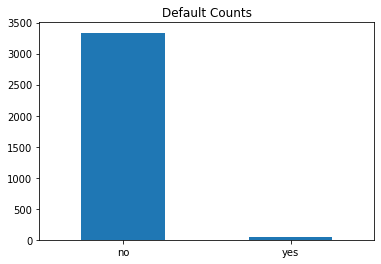

In [32]:
train['default'].value_counts().plot(kind='bar', title='Default Counts')
plt.xticks(rotation=0)

We can see that the frequent class in column 'default' is 'no'. Thus, 'no' is mapped to 1 and 'yes' to 0.

In [33]:
train['default'] = train['default'].map({'no':1, 'yes':0}).astype(int)

Data Transformation on column HOUSING : We will plot 'housing' to see the number of yes and no.

(array([0, 1]), [Text(0, 0, 'yes'), Text(1, 0, 'no')])

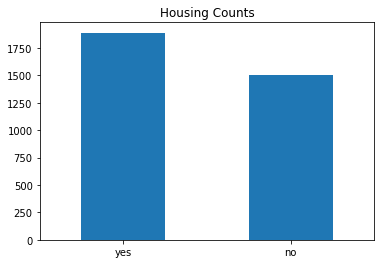

In [34]:
train['housing'].value_counts().plot(kind='bar', title='Housing Counts')
plt.xticks(rotation=0)

We can see that the frequent class in column 'housing' is 'yes'. Thus, 'yes' is mapped to 1 and 'no' to 0.

In [35]:
train['housing'] = train['housing'].map({'yes':1, 'no':0}).astype(int)

Data Transformation on column LOAN : We will plot 'loan' to see the number of yes and no.

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

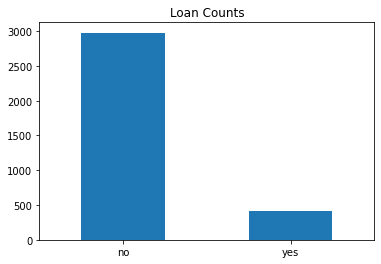

In [36]:
train['loan'].value_counts().plot(kind='bar', title='Loan Counts')
plt.xticks(rotation=0)

We can see that the frequent class in column 'loan' is 'no'. Thus, 'no' is mapped to 1 and 'yes' to 0.

In [37]:
train['loan'] = train['loan'].map({'no':1, 'yes':0}).astype(int)

Data Transformation on column CONTACT : one hot vector of length 3

In [38]:
cols = pd.get_dummies(train['contact'], prefix= 'contact')
train[cols.columns] = cols
train.drop('contact', axis = 1, inplace = True)

Data Transformation on column MONTH : one hot vector of length 12

In [39]:
cols = pd.get_dummies(train['month'], prefix= 'month')
train[cols.columns] = cols
train.drop('month', axis = 1, inplace = True)

Data Transformation on column POUTCOME : one hot vector of length 4

In [40]:
cols = pd.get_dummies(train['poutcome'], prefix= 'poutcome')
train[cols.columns] = cols
train.drop('poutcome', axis = 1, inplace = True)

Data Transformation on column y(target value) : We will plot 'y' to see the number of yes and no.

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

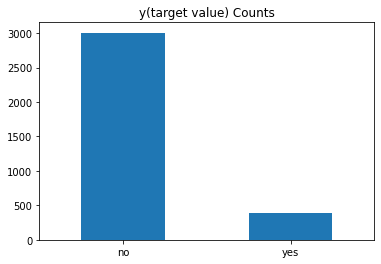

In [41]:
train['y'].value_counts().plot(kind='bar', title='y(target value) Counts')
plt.xticks(rotation=0)

We can see that the frequent class in column 'y' is 'no'. Thus, 'no' is mapped to 1 and 'yes' to 0.

In [42]:
train['y'] = train['y'].map({'no':1, 'yes':0}).astype(int)

Data Transformation on column DAY : one hot vector of length 31 (Since, it represents the last contact day of the month)

In [43]:
cols = pd.get_dummies(train['day'], prefix= 'day')
train[cols.columns] = cols
train.drop('day', axis = 1, inplace = True)

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 4384 to 2732
Data columns (total 76 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                3390 non-null   int32
 1   education          3390 non-null   int32
 2   default            3390 non-null   int32
 3   balance            3390 non-null   int64
 4   housing            3390 non-null   int32
 5   loan               3390 non-null   int32
 6   duration           3390 non-null   int64
 7   campaign           3390 non-null   int64
 8   pdays              3390 non-null   int64
 9   previous           3390 non-null   int64
 10  y                  3390 non-null   int32
 11  job_admin.         3390 non-null   uint8
 12  job_blue-collar    3390 non-null   uint8
 13  job_entrepreneur   3390 non-null   uint8
 14  job_housemaid      3390 non-null   uint8
 15  job_management     3390 non-null   uint8
 16  job_retired        3390 non-null   uint8
 17  job_self-em

In [45]:
train.shape

(3390, 76)

### Imputing Missing Values in Test data

The imputatin of missing values performed for the train data should be replicated for the test data as well. 

In [46]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1131 entries, 4274 to 1606
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1131 non-null   int64  
 1   age        911 non-null    float64
 2   job        1065 non-null   object 
 3   marital    1101 non-null   object 
 4   education  1076 non-null   object 
 5   default    1131 non-null   object 
 6   balance    1131 non-null   int64  
 7   housing    1131 non-null   object 
 8   loan       1070 non-null   object 
 9   contact    1036 non-null   object 
 10  day        1131 non-null   int64  
 11  month      1049 non-null   object 
 12  duration   1131 non-null   int64  
 13  campaign   1131 non-null   int64  
 14  pdays      1131 non-null   int64  
 15  previous   1131 non-null   int64  
 16  poutcome   1131 non-null   object 
 17  y          1131 non-null   object 
dtypes: float64(1), int64(7), object(10)
memory usage: 123.7+ KB


In [47]:
test.drop('ID', axis = 1, inplace = True)

In [48]:
test.describe()

,age,balance,day,duration,campaign,pdays,previous
count,911.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000
mean,41.148189,1394.261715,16.116711,275.000884,2.796640,38.904509,0.540230
std,10.394789,2819.343894,8.294608,281.583539,3.234114,98.235403,1.689876
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,61.500000,9.000000,105.000000,1.000000,-1.000000,0.000000
50%,40.000000,456.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,48.000000,1547.000000,22.000000,324.000000,3.000000,-1.000000,0.000000
max,83.000000,27359.000000,31.000000,2087.000000,32.000000,541.000000,23.000000


In [49]:
test.columns[test.isnull().any()]

Index(['age', 'job', 'marital', 'education', 'loan', 'contact', 'month'], dtype='object')

In [50]:
# Feature: AGE
test['age']= test['age'].fillna(test['age'].median())
test['age'] = test['age'].astype(int)

# Feature: MARITAL
test['marital'].replace(np.NaN, 'married', inplace = True)

# Feature: EDUCATION
test['education'].replace(np.NaN, 'secondary', inplace = True)

# Feature: JOB
test['job'].replace(np.NaN, 'management', inplace = True)

# Feature: LOAN
test['loan'].replace(np.NaN, 'no', inplace = True)

# Feature: CONTACT
test['contact'].replace(np.NaN, 'cellular', inplace = True)

# Feature: MONTH
test['month'].replace(np.NaN, 'may', inplace = True)

In [51]:
test.columns[test.isnull().any()]

Index([], dtype='object')

In [52]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1131 entries, 4274 to 1606
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        1131 non-null   int32 
 1   job        1131 non-null   object
 2   marital    1131 non-null   object
 3   education  1131 non-null   object
 4   default    1131 non-null   object
 5   balance    1131 non-null   int64 
 6   housing    1131 non-null   object
 7   loan       1131 non-null   object
 8   contact    1131 non-null   object
 9   day        1131 non-null   int64 
 10  month      1131 non-null   object
 11  duration   1131 non-null   int64 
 12  campaign   1131 non-null   int64 
 13  pdays      1131 non-null   int64 
 14  previous   1131 non-null   int64 
 15  poutcome   1131 non-null   object
 16  y          1131 non-null   object
dtypes: int32(1), int64(6), object(10)
memory usage: 110.4+ KB


### Data Transformation - Test Data

The data transformation steps performed for the train data should be replicated for the test data as well.

In [53]:
# Feature: JOB
cols = pd.get_dummies(test['job'], prefix= 'job')
test[cols.columns] = cols
test.drop('job', axis = 1, inplace = True)

#Feature: MARITAL
cols = pd.get_dummies(test['marital'], prefix= 'marital')
test[cols.columns] = cols
test.drop('marital', axis = 1, inplace = True)

# Feature: EDUCATION
test['education'] = test['education'].map({'unknown':0, 'primary':1, 'secondary':2, 'tertiary':3}).astype(int)

# Feature: DEFAULT
test['default'] = test['default'].map({'no':1, 'yes':0}).astype(int)

# Feature: HOUSING
test['housing'] = test['housing'].map({'yes':1, 'no':0}).astype(int)

# Feature: LOAN
test['loan'] = test['loan'].map({'no':1, 'yes':0}).astype(int)

# Feature: CONTACT
cols = pd.get_dummies(test['contact'], prefix= 'contact')
test[cols.columns] = cols
test.drop('contact', axis = 1, inplace = True)

# Feature: MONTH
cols = pd.get_dummies(test['month'], prefix= 'month')
test[cols.columns] = cols
test.drop('month', axis = 1, inplace = True)

# Feature: POUTCOME
cols = pd.get_dummies(test['poutcome'], prefix= 'poutcome')
test[cols.columns] = cols
test.drop('poutcome', axis = 1, inplace = True)

# Feature: Y (Target Value)
test['y'] = test['y'].map({'no':1, 'yes':0}).astype(int)

# Feature: DAY
cols = pd.get_dummies(test['day'], prefix= 'day')
test[cols.columns] = cols
test.drop('day', axis = 1, inplace = True)

In [54]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1131 entries, 4274 to 1606
Data columns (total 76 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                1131 non-null   int32
 1   education          1131 non-null   int32
 2   default            1131 non-null   int32
 3   balance            1131 non-null   int64
 4   housing            1131 non-null   int32
 5   loan               1131 non-null   int32
 6   duration           1131 non-null   int64
 7   campaign           1131 non-null   int64
 8   pdays              1131 non-null   int64
 9   previous           1131 non-null   int64
 10  y                  1131 non-null   int32
 11  job_admin.         1131 non-null   uint8
 12  job_blue-collar    1131 non-null   uint8
 13  job_entrepreneur   1131 non-null   uint8
 14  job_housemaid      1131 non-null   uint8
 15  job_management     1131 non-null   uint8
 16  job_retired        1131 non-null   uint8
 17  job_self-em

In [55]:
test.shape

(1131, 76)

#### We have imputed the missing values as well as performed data transformation. Thus, our train and test data sets are completely clean. Now, the next steps will be to separate the feature set and target value in the train and test data and then, perform scaling on the feature set of train and test data. 

### Separating Feature set and Target value in Train and Test Data Sets

In [56]:
# Create feature set and target value in train data
train_feature = train.drop('y', axis = 1)
train_target = train['y']

# Create feature set and target value in test data
test_feature = test.drop('y', axis = 1)
test_target = test['y']

### Since, it is a Classification problem, we perform MinMaxScaler() to scale the feature set in train and test data

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_feature_scaled = scaler.fit_transform(train_feature)
test_feature_scaled = scaler.transform(test_feature)

In [58]:
# Convert array back to dataframe
from pandas import DataFrame
train_scaled = DataFrame(train_feature_scaled)

In [59]:
train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 75 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3390 non-null   float64
 1   1       3390 non-null   float64
 2   2       3390 non-null   float64
 3   3       3390 non-null   float64
 4   4       3390 non-null   float64
 5   5       3390 non-null   float64
 6   6       3390 non-null   float64
 7   7       3390 non-null   float64
 8   8       3390 non-null   float64
 9   9       3390 non-null   float64
 10  10      3390 non-null   float64
 11  11      3390 non-null   float64
 12  12      3390 non-null   float64
 13  13      3390 non-null   float64
 14  14      3390 non-null   float64
 15  15      3390 non-null   float64
 16  16      3390 non-null   float64
 17  17      3390 non-null   float64
 18  18      3390 non-null   float64
 19  19      3390 non-null   float64
 20  20      3390 non-null   float64
 21  21      3390 non-null   float64
 22  

In [60]:
# Convert array back to dataframe
from pandas import DataFrame
test_scaled = DataFrame(test_feature_scaled)

In [61]:
test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131 entries, 0 to 1130
Data columns (total 75 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1131 non-null   float64
 1   1       1131 non-null   float64
 2   2       1131 non-null   float64
 3   3       1131 non-null   float64
 4   4       1131 non-null   float64
 5   5       1131 non-null   float64
 6   6       1131 non-null   float64
 7   7       1131 non-null   float64
 8   8       1131 non-null   float64
 9   9       1131 non-null   float64
 10  10      1131 non-null   float64
 11  11      1131 non-null   float64
 12  12      1131 non-null   float64
 13  13      1131 non-null   float64
 14  14      1131 non-null   float64
 15  15      1131 non-null   float64
 16  16      1131 non-null   float64
 17  17      1131 non-null   float64
 18  18      1131 non-null   float64
 19  19      1131 non-null   float64
 20  20      1131 non-null   float64
 21  21      1131 non-null   float64
 22  

### Classification Models

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
import matplotlib.gridspec as gridspec
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from numpy import sqrt
from numpy import argmax
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

### 1. kNN Classification

In [63]:
param_grid = {'n_neighbors': [3,4,5,6,7,8,9,10,11,12],
              'weights': ['uniform','distance'],
              'metric': ['euclidean','manhattan']}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid, n_jobs = -1, cv=5, return_train_score=True)

In [64]:
grid_search_knn.fit(train_scaled, train_target)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'weights': ['uniform', 'distance']},
             return_train_score=True)

In [65]:
print("Best parameters: {}".format(grid_search_knn.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_knn.best_score_))

Best parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
Best cross-validation score: 0.89


In [66]:
print("Best train score: {:.4f}".format(grid_search_knn.score(train_scaled,train_target)))
print("Best test score: {:.4f}".format(grid_search_knn.score(test_scaled,test_target)))

Best train score: 0.8953
Best test score: 0.8789


#### As we can see from above, the best parameters for kNN model are metric = manhattan, weights = uniform with k=11. Let us now evaluate our model based on different strategies.

### Evaluation of kNN Model

#### We shall plot the Confusion Matrix, Precision Recall Curve, ROC Curve and calculate the F1 Score and the ROC_AUC Score.

##### Confusion Matrix

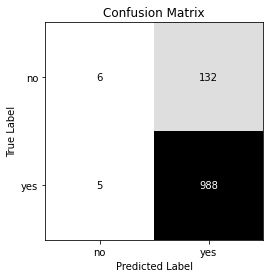

In [67]:
%matplotlib inline
import mglearn
knnPred = grid_search_knn.predict(test_scaled)
scores_image = mglearn.tools.heatmap(
    confusion_matrix(test_target, knnPred), xlabel='Predicted Label',
    ylabel='True Label', xticklabels=df.y.unique(),
    yticklabels=df.y.unique(), cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion Matrix")
plt.gca().invert_yaxis()

#### We can see that - True Positive = 988, True Negative = 6, False Positive = 132 and False Negative = 5.
#### Accuracy = (988 + 6) / (988 + 6 + 132 + 5) = 0.8789
#### Precision = 988 / (988 + 132) = 0.8821
#### Recall = 988 / (988 + 5) = 0.995

##### Precision Recall Curve

Best Threshold=0.454545


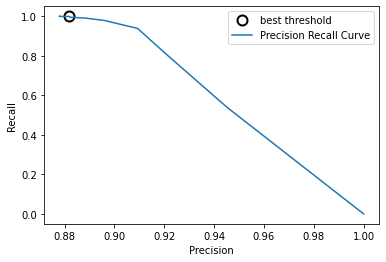

In [68]:
%matplotlib inline

knn_prob = grid_search_knn.predict_proba(test_scaled)
knn_prob = knn_prob[:,1]

precision, recall, thresholds = precision_recall_curve(test_target, knn_prob)

f = (2 * precision * recall) / (precision + recall)
i = argmax(f)

print('Best Threshold=%f' % (thresholds[i]))

optimal_threshold = np.argmin(np.abs(thresholds-thresholds[i]))


plt.plot(precision[optimal_threshold], recall[optimal_threshold], 'o', markersize=10,
         label="best threshold", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="Precision Recall Curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")
plt.show()

##### ROC Curve

Best Threshold=1.000000


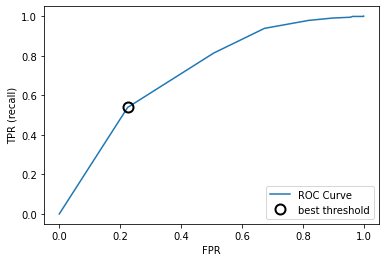

In [69]:
%matplotlib inline

knn_prob = grid_search_knn.predict_proba(test_scaled)
knn_prob = knn_prob[:,1]

fpr, tpr, thresholds = roc_curve(test_target, knn_prob)

i = tpr-fpr
bt = argmax(i)

print('Best Threshold=%f' % (thresholds[bt]))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

optimal_threshold = np.argmin(np.abs(thresholds - thresholds[bt]))
plt.plot(fpr[optimal_threshold], tpr[optimal_threshold], 'o', markersize=10,
         label="best threshold", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

##### F1 Score

In [70]:
print("F1 score K Neighbors Classifier: {:.4f}".format(f1_score(test_target, knnPred)))

F1 score K Neighbors Classifier: 0.9352


##### ROC_AUC Score

In [71]:
knn_prob = grid_search_knn.predict_proba(test_scaled)
knn_prob = knn_prob[:,1]
rascore_knn = roc_auc_score(test_target, knn_prob)
print("ROC_AUC Score for K Neighbors Classifier: {:.4f}".format(rascore_knn))

ROC_AUC Score for K Neighbors Classifier: 0.7161


### 2. Logistic Regression

In [72]:
param_grid = {'C': [0.01,0.1,1,10,100],
              'penalty': ['l1','l2']}
grid_search_logistic = GridSearchCV(LogisticRegression(), param_grid, n_jobs = -1, cv=5, return_train_score=True)

In [73]:
grid_search_logistic.fit(train_scaled, train_target)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             return_train_score=True)

In [74]:
print("Best parameters: {}".format(grid_search_logistic.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_logistic.best_score_))

Best parameters: {'C': 1, 'penalty': 'l2'}
Best cross-validation score: 0.90


In [75]:
print("Best train score: {:.4f}".format(grid_search_logistic.score(train_scaled,train_target)))
print("Best test score: {:.4f}".format(grid_search_logistic.score(test_scaled,test_target)))

Best train score: 0.9012
Best test score: 0.8895


#### As we can see from above, the best parameters for Logistic Regression model are c = 1 and penalty = l2. Let us now evaluate our model based on different strategies.

### Evaluation of Logistic Regression Model

##### Confusion Matrix

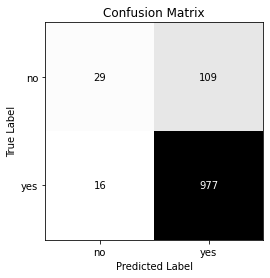

In [76]:
%matplotlib inline
logRegPred = grid_search_logistic.predict(test_scaled)
scores_image = mglearn.tools.heatmap(
    confusion_matrix(test_target, logRegPred), xlabel='Predicted Label',
    ylabel='True Label', xticklabels=df.y.unique(),
    yticklabels=df.y.unique(), cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion Matrix")
plt.gca().invert_yaxis()

#### We can see that - True Positive = 977, True Negative = 29, False Positive = 109 and False Negative = 16.
#### Accuracy = (977 + 29) / (977 + 29 + 109 + 16) = 0.8895
#### Precision = 977 / (977 + 109) = 0.8996
#### Recall = 977 / (977 + 16) = 0.9839

##### Precision Recall Curve

Best Threshold=0.630725


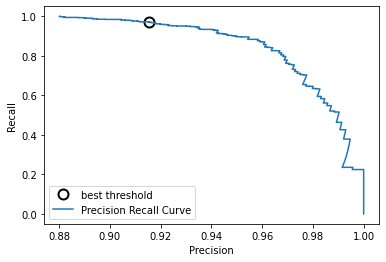

In [77]:
%matplotlib inline

lr_prob = grid_search_logistic.predict_proba(test_scaled)
lr_prob = lr_prob[:,1]

precision, recall, thresholds = precision_recall_curve(test_target, lr_prob)

f = (2 * precision * recall) / (precision + recall)
i = argmax(f)

print('Best Threshold=%f' % (thresholds[i]))

optimal_threshold = np.argmin(np.abs(thresholds-thresholds[i]))

plt.plot(precision[optimal_threshold], recall[optimal_threshold], 'o', markersize=10,
         label="best threshold", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="Precision Recall Curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

##### ROC Curve

Best Threshold=0.883810


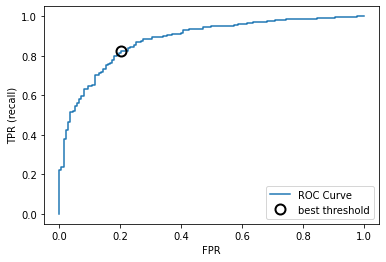

In [78]:
%matplotlib inline

lr_prob = grid_search_logistic.predict_proba(test_scaled)
lr_prob = lr_prob[:,1]

fpr, tpr, thresholds = roc_curve(test_target, lr_prob)

i = tpr-fpr
bt = argmax(i)

print('Best Threshold=%f' % (thresholds[bt]))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

optimal_threshold = np.argmin(np.abs(thresholds - thresholds[bt]))
plt.plot(fpr[optimal_threshold], tpr[optimal_threshold], 'o', markersize=10,
         label="best threshold", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

##### F1 Score

In [79]:
print("F1 score Logistic Regression: {:.2f}".format(f1_score(test_target, logRegPred)))

F1 score Logistic Regression: 0.94


##### ROC_AUC Score

In [80]:
lr_prob = grid_search_logistic.predict_proba(test_scaled)
lr_prob = lr_prob[:,1]
rascore_lr = roc_auc_score(test_target, lr_prob)
print("ROC_AUC Score for Logistic Regression: {:.4f}".format(rascore_lr))

ROC_AUC Score for Logistic Regression: 0.8812


### 3. Linear Support Vector Machine

In [81]:
param_grid = {'C': [0.001,0.01,0.1,1,10,100]}
grid_search_lsvc = GridSearchCV(LinearSVC(), param_grid, n_jobs = -1, cv=5, return_train_score=True)

In [82]:
grid_search_lsvc.fit(train_scaled, train_target)

GridSearchCV(cv=5, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [83]:
print("Best parameters: {}".format(grid_search_lsvc.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_lsvc.best_score_))

Best parameters: {'C': 10}
Best cross-validation score: 0.90


In [84]:
print("Best train score: {:.4f}".format(grid_search_lsvc.score(train_scaled,train_target)))
print("Best test score: {:.4f}".format(grid_search_lsvc.score(test_scaled,test_target)))

Best train score: 0.9018
Best test score: 0.8912


#### As we can see from above, the best parameter for Linear SVM Model is c = 10. Let us now evaluate the model.

### Evaluation of Linear Support Vector Machine Model

##### Confusion Matrix

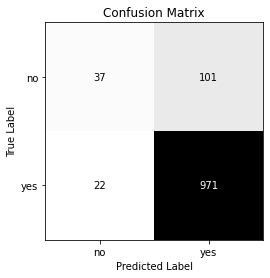

In [85]:
%matplotlib inline
lsvcPred = grid_search_lsvc.predict(test_scaled)
scores_image = mglearn.tools.heatmap(
    confusion_matrix(test_target, lsvcPred), xlabel='Predicted Label',
    ylabel='True Label', xticklabels=df.y.unique(),
    yticklabels=df.y.unique(), cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion Matrix")
plt.gca().invert_yaxis()

#### We can see that - True Positive = 970, True Negative = 38, False Positive = 100 and False Negative = 23.
#### Accuracy = (970 + 38)/(970 + 38 + 100 + 23) = 0.8912
#### Precision = 970/(970 + 100) = 0.9065
#### Recall = 970/(970 + 23) = 0.9768

##### Precision Recall Curve

Best Threshold=0.056025


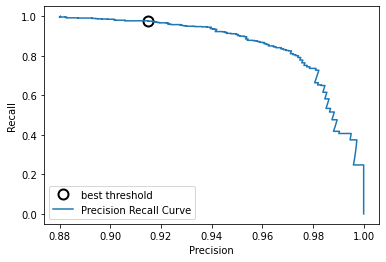

In [86]:
%matplotlib inline

lsvc_prob = grid_search_lsvc.decision_function(test_scaled)

precision, recall, thresholds = precision_recall_curve(test_target, lsvc_prob)

f = (2 * precision * recall) / (precision + recall)
i = argmax(f)

print('Best Threshold=%f' % (thresholds[i]))

optimal_threshold = np.argmin(np.abs(thresholds-thresholds[i]))

plt.plot(precision[optimal_threshold], recall[optimal_threshold], 'o', markersize=10,
         label="best threshold", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="Precision Recall Curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

##### ROC Curve

Best Threshold=0.700401


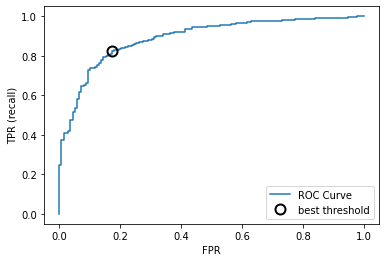

In [87]:
%matplotlib inline

lsvc_prob = grid_search_lsvc.decision_function(test_scaled)

fpr, tpr, thresholds = roc_curve(test_target, lsvc_prob)

i = tpr-fpr
bt = argmax(i)

print('Best Threshold=%f' % (thresholds[bt]))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

optimal_threshold = np.argmin(np.abs(thresholds - thresholds[bt]))
plt.plot(fpr[optimal_threshold], tpr[optimal_threshold], 'o', markersize=10,
         label="best threshold", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

##### F1 Score

In [88]:
print("F1 score Linear SVC: {:.4f}".format(f1_score(test_target, lsvcPred)))

F1 score Linear SVC: 0.9404


##### ROC_AUC Score

In [89]:
lsvc_prob = grid_search_lsvc.decision_function(test_scaled)
rascore_lsvc = roc_auc_score(test_target, lsvc_prob)
print("ROC_AUC Score for Linear SVC: {:.4f}".format(rascore_lsvc))

ROC_AUC Score for Linear SVC: 0.8906


### 4. Kernelized SVM using rbf kernel

In [90]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_rbf = GridSearchCV(SVC(kernel="rbf"), param_grid, n_jobs = -1, cv=5, return_train_score=True)

In [91]:
grid_search_rbf.fit(train_scaled, train_target)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [92]:
print("Best parameters: {}".format(grid_search_rbf.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_rbf.best_score_))

Best parameters: {'C': 100, 'gamma': 0.01}
Best cross-validation score: 0.90


In [93]:
print("Best train score: {:.4f}".format(grid_search_rbf.score(train_scaled,train_target)))
print("Best test score: {:.4f}".format(grid_search_rbf.score(test_scaled,test_target)))

Best train score: 0.9118
Best test score: 0.8974


#### As we can see from above, the best hyper parameters for the SVC with RBF kernel are c = 100 and gamma = 0.01. Let us now evaluate the model. 

### Evaluation of Kernelized SVM with RBF Kernel

##### Confusion Matrix

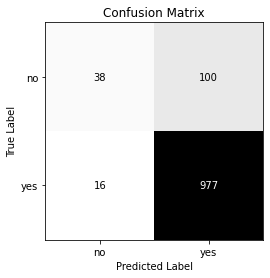

In [94]:
%matplotlib inline
rbfPred = grid_search_rbf.predict(test_scaled)
scores_image = mglearn.tools.heatmap(
    confusion_matrix(test_target, rbfPred), xlabel='Predicted Label',
    ylabel='True Label', xticklabels=df.y.unique(),
    yticklabels=df.y.unique(), cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion Matrix")
plt.gca().invert_yaxis()

#### We can see that - True Positive = 977, True Negative = 38, False Positive = 100 and False Negative = 16.
#### Accuracy = (977 + 38) / (977 + 38 + 100 + 16) = 0.8974
#### Precision = 977 / (977 + 100) = 0.9071
#### Recall = 977 / (977 + 16) = 0.9839

##### Precision Recall Curve

Best Threshold=0.198803


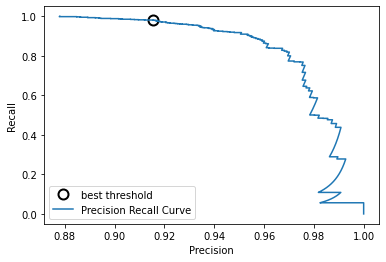

In [95]:
%matplotlib inline

rbf_prob = grid_search_rbf.decision_function(test_scaled)

precision, recall, thresholds = precision_recall_curve(test_target, rbf_prob)

f = (2 * precision * recall) / (precision + recall)
i = argmax(f)

print('Best Threshold=%f' % (thresholds[i]))

optimal_threshold = np.argmin(np.abs(thresholds-thresholds[i]))

plt.plot(precision[optimal_threshold], recall[optimal_threshold], 'o', markersize=10,
         label="best threshold", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="Precision Recall Curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

##### ROC Curve

Best Threshold=1.088652


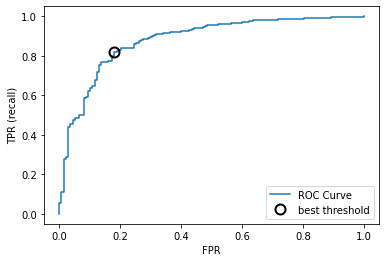

In [96]:
%matplotlib inline

rbf_prob = grid_search_rbf.decision_function(test_scaled)

fpr, tpr, thresholds = roc_curve(test_target, rbf_prob)

i = tpr-fpr
bt = argmax(i)

print('Best Threshold=%f' % (thresholds[bt]))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

optimal_threshold = np.argmin(np.abs(thresholds - thresholds[bt]))
plt.plot(fpr[optimal_threshold], tpr[optimal_threshold], 'o', markersize=10,
         label="best threshold", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

##### F1 Score

In [97]:
print("F1 Score Kernelized SVC with RBF Kernel: {:.4f}".format(f1_score(test_target, rbfPred)))

F1 Score Kernelized SVC with RBF Kernel: 0.9440


##### ROC_AUC Score

In [98]:
rbf_prob = grid_search_rbf.decision_function(test_scaled)
rascore_rbf = roc_auc_score(test_target, rbf_prob)
print("ROC_AUC Score for Kernelized SVC with RBF Kernel: {:.4f}".format(rascore_rbf))

ROC_AUC Score for Kernelized SVC with RBF Kernel: 0.8791


### 5. Kernelized SVM using poly kernel

In [99]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search_poly = GridSearchCV(SVC(kernel="poly"), param_grid, n_jobs = -1, cv=5, return_train_score=True)

In [100]:
grid_search_poly.fit(train_scaled, train_target)

GridSearchCV(cv=5, estimator=SVC(kernel='poly'), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [101]:
print("Best parameters: {}".format(grid_search_poly.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_poly.best_score_))

Best parameters: {'C': 1}
Best cross-validation score: 0.89


In [102]:
print("Best train score: {:.4f}".format(grid_search_poly.score(train_scaled,train_target)))
print("Best test score: {:.4f}".format(grid_search_poly.score(test_scaled,test_target)))

Best train score: 0.9103
Best test score: 0.8895


#### As we can see here that the best hyperparameter value for Kernelized SVM with POLY Kernel is c = 1. Let us now evaluate our model.

### Evaluation of Kernelized SVM with POLY Kernel 

##### Confusion Matrix

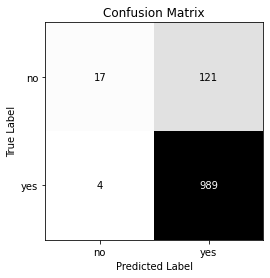

In [103]:
%matplotlib inline
polyPred = grid_search_poly.predict(test_scaled)
scores_image = mglearn.tools.heatmap(
    confusion_matrix(test_target, polyPred), xlabel='Predicted Label',
    ylabel='True Label', xticklabels=df.y.unique(),
    yticklabels=df.y.unique(), cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion Matrix")
plt.gca().invert_yaxis()

#### We can see that - True Positive = 989, True Negative = 17, False Positive = 121 and False Negative = 4.
#### Accuracy = (989 + 17) / (989 + 17 + 121 + 4) = 0.8895
#### Precision = 989 / (989 + 121) = 0.8910
#### Recall = 989 / (989 + 4) = 0.9960

##### Precision Recall Curve

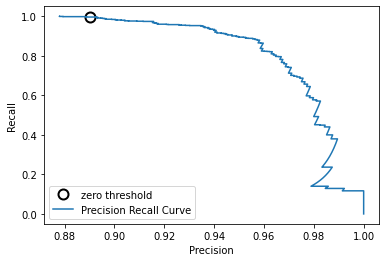

In [104]:
%matplotlib inline

poly_prob = grid_search_poly.decision_function(test_scaled)

precision, recall, thresholds = precision_recall_curve(test_target, poly_prob)

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="zero threshold", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="Precision Recall Curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

##### ROC Curve

Best Threshold=0.908036


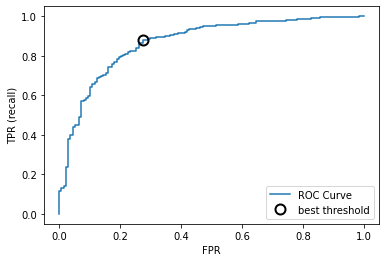

In [105]:
%matplotlib inline

poly_prob = grid_search_poly.decision_function(test_scaled)

fpr, tpr, thresholds = roc_curve(test_target, poly_prob)

i = tpr-fpr
bt = argmax(i)

print('Best Threshold=%f' % (thresholds[bt]))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

optimal_threshold = np.argmin(np.abs(thresholds - thresholds[bt]))
plt.plot(fpr[optimal_threshold], tpr[optimal_threshold], 'o', markersize=10,
         label="best threshold", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

##### F1 Score

In [106]:
print("F1 score Kernelized SVM with Poly Kernel: {:.4f}".format(f1_score(test_target, polyPred)))

F1 score Kernelized SVM with Poly Kernel: 0.9406


##### ROC_AUC Curve

In [107]:
poly_prob = grid_search_poly.decision_function(test_scaled)
rascore_poly = roc_auc_score(test_target, poly_prob)
print("ROC_AUC Score for Kernelized SVM with Poly Kernel: {:.4f}".format(rascore_poly))

ROC_AUC Score for Kernelized SVM with Poly Kernel: 0.8680


### 6. Kernelized SVM using linear kernel

In [108]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search_svcl = GridSearchCV(SVC(kernel="linear"), param_grid, n_jobs = -1, cv=5, return_train_score=True)

In [109]:
grid_search_svcl.fit(train_scaled, train_target)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [110]:
print("Best parameters: {}".format(grid_search_svcl.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_svcl.best_score_))

Best parameters: {'C': 10}
Best cross-validation score: 0.89


In [111]:
print("Best train score: {:.4f}".format(grid_search_svcl.score(train_scaled,train_target)))
print("Best test score: {:.4f}".format(grid_search_svcl.score(test_scaled,test_target)))

Best train score: 0.8929
Best test score: 0.8921


#### We can see from above that the best hyperparameter value for Kernelized SVM with linear kernel is c = 10. We shall now evaluate our model.

### Evaluation of Kernelized SVM with LINEAR Kernel

##### Confusion Matrix

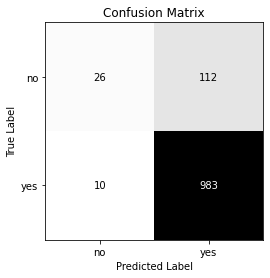

In [112]:
%matplotlib inline
svclPred = grid_search_svcl.predict(test_scaled)
scores_image = mglearn.tools.heatmap(
    confusion_matrix(test_target, svclPred), xlabel='Predicted Label',
    ylabel='True Label', xticklabels=df.y.unique(),
    yticklabels=df.y.unique(), cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion Matrix")
plt.gca().invert_yaxis()

#### We can see that - True Positive = 983, True Negative = 26, False Positive = 112 and False Negative = 10.
#### Accuracy = (983 + 26) / (983 + 26 + 112 + 10) = 0.8921
#### Precision = 983 / (983 + 112) = 0.8977
#### Recall = 983 / (983 + 10) = 0.9899

##### Precision Recall Curve

Best Threshold=0.576453


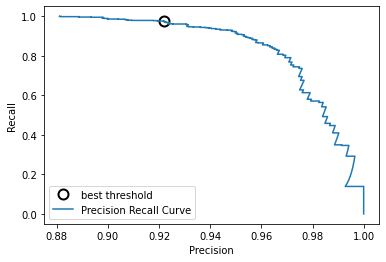

In [113]:
%matplotlib inline

svcl_prob = grid_search_svcl.decision_function(test_scaled)

precision, recall, thresholds = precision_recall_curve(test_target, svcl_prob)

f = (2 * precision * recall) / (precision + recall)
i = argmax(f)

print('Best Threshold=%f' % (thresholds[i]))

optimal_threshold = np.argmin(np.abs(thresholds-thresholds[i]))

plt.plot(precision[optimal_threshold], recall[optimal_threshold], 'o', markersize=10,
         label="best threshold", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="Precision Recall Curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

##### ROC Curve

Best Threshold=1.089741


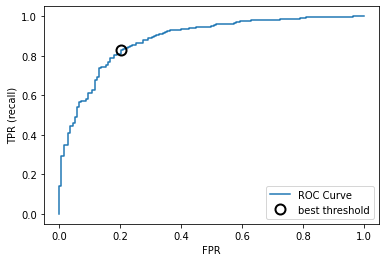

In [114]:
%matplotlib inline

svcl_prob = grid_search_svcl.decision_function(test_scaled)

fpr, tpr, thresholds = roc_curve(test_target, svcl_prob)

i = tpr-fpr
bt = argmax(i)

print('Best Threshold=%f' % (thresholds[bt]))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

optimal_threshold = np.argmin(np.abs(thresholds - thresholds[bt]))
plt.plot(fpr[optimal_threshold], tpr[optimal_threshold], 'o', markersize=10,
         label="best threshold", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

##### F1 Score

In [115]:
print("F1 Score Kernelized SVM with Linear Kernel: {:.4f}".format(f1_score(test_target, svclPred)))

F1 Score Kernelized SVM with Linear Kernel: 0.9416


##### ROC_AUC Score

In [116]:
svcl_prob = grid_search_svcl.decision_function(test_scaled)
rascore_svcl = roc_auc_score(test_target, svcl_prob)
print("ROC_AUC Score for Kernelized SVM with Linear Kernel: {:.4f}".format(rascore_svcl))

ROC_AUC Score for Kernelized SVM with Linear Kernel: 0.8824


### 7. Decision Tree Classifier

In [117]:
param_grid = {'max_depth': range(1,20)}
grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, return_train_score=True)

In [118]:
grid_search_dt.fit(train_scaled, train_target)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 20)}, return_train_score=True)

In [119]:
print("Best parameters: {}".format(grid_search_dt.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_dt.best_score_))

Best parameters: {'max_depth': 3}
Best cross-validation score: 0.89


In [120]:
print("Best train score: {:.4f}".format(grid_search_dt.score(train_scaled,train_target)))
print("Best test score: {:.4f}".format(grid_search_dt.score(test_scaled,test_target)))

Best train score: 0.9035
Best test score: 0.8966


#### As we can see here that the best parameter for Decision Tree Classifier is max depth = 4. We will now evaluate our model.

### Evaluation of Decision Tree Classifier Model

##### Confusion Matrix

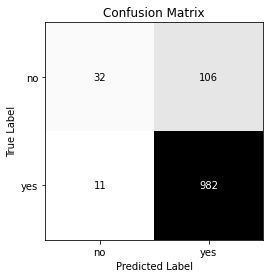

In [121]:
%matplotlib inline
dtPred = grid_search_dt.predict(test_scaled)
scores_image = mglearn.tools.heatmap(
    confusion_matrix(test_target, dtPred), xlabel='Predicted Label',
    ylabel='True Label', xticklabels=df.y.unique(),
    yticklabels=df.y.unique(), cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion Matrix")
plt.gca().invert_yaxis()

#### We can see that - True Positive = 982, True Negative = 29, False Positive = 109 and False Negative = 11.
#### Accuracy = (982 + 29) / (982 + 29 + 109 + 11) = 0.8939
#### Precision = 982 / (982 + 109) = 0.9001
#### Recall = 982 / (982 + 11) = 0.9889

##### Precision Recall Curve

Best Threshold=0.569507


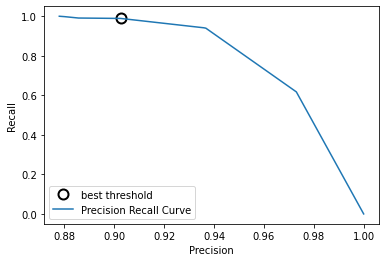

In [122]:
%matplotlib inline

dt_prob = grid_search_dt.predict_proba(test_scaled)
dt_prob = dt_prob[:,1]

precision, recall, thresholds = precision_recall_curve(test_target, dt_prob)

f = (2 * precision * recall) / (precision + recall)
i = argmax(f)

print('Best Threshold=%f' % (thresholds[i]))

optimal_threshold = np.argmin(np.abs(thresholds-thresholds[i]))

plt.plot(precision[optimal_threshold], recall[optimal_threshold], 'o', markersize=10,
         label="best threshold", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="Precision Recall Curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

##### ROC Curve

Best Threshold=0.978712


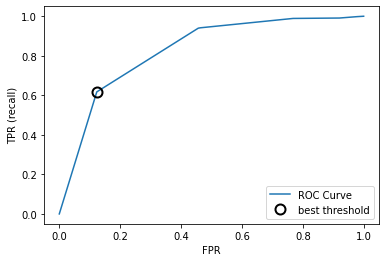

In [123]:
%matplotlib inline

dt_prob = grid_search_dt.predict_proba(test_scaled)
dt_prob = dt_prob[:,1]

fpr, tpr, thresholds = roc_curve(test_target, dt_prob)

i = tpr-fpr
bt = argmax(i)

print('Best Threshold=%f' % (thresholds[bt]))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

optimal_threshold = np.argmin(np.abs(thresholds - thresholds[bt]))
plt.plot(fpr[optimal_threshold], tpr[optimal_threshold], 'o', markersize=10,
         label="best threshold", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

##### F1 Score

In [124]:
print("F1 Score Decision Tree Classifier: {:.4f}".format(f1_score(test_target, dtPred)))

F1 Score Decision Tree Classifier: 0.9438


##### ROC_AUC Curve

In [125]:
dt_prob = grid_search_dt.predict_proba(test_scaled)
dt_prob = dt_prob[:,1]
rascore_dt = roc_auc_score(test_target, dt_prob)
print("ROC_AUC Score for Decision Tree Classifier: {:.4f}".format(rascore_dt))

ROC_AUC Score for Decision Tree Classifier: 0.8281


### Best Model for the Classification Dataset

#### The different Evaluation strategies that we used in order to evaluate our Classification model were:-
1. Cross Validation Score
2. Train and Test Score
3. Confusion Matrix - Accuracy, Precision and Recall
4. Precision Recall Curve
5. ROC Curve
6. F1 Score
7. ROC_AUC Score



#### Our Classification Goal is to predict whether the client will subscribe for the term deposit - yes or no. 

1. If a client has already subscribed for the term deposit but is classified as not subscribed, that is False Negative, then, the bank will take efforts to send out emails to attract these clients, which will be a waste of resources because the client had already subscribed.
2. On the other hand, if a client has not subscribed for the term deposit but is classified as subscribed, that is False Positive, then this is also an issue because the bank will consider this client as its important client who has already subscribed for the term deposit, and might not send out emails to them. So, these clients will actually never become their true clients.
3. Thus, for this scenario, False Positives as well as False Negatives are equally important. Thus, we will consider the F1 Score to evaluate the performance of our model.
4. When we look at the target column (y), we find out that it is imbalanced. The number of negative values (0) is much more higher than the number of positive values (1). For imbalanced classification, the ROC_AUC Score is the best parameter for evaluation. 
5. Thus, we will base our inferences based on two parameters - F1 Score and ROC_AUC Score.

#### The best ROC_AUC Score is for the Linear Support Vector Machine model with ROC_AUC Score = 0.8906. 
#### Also, the F1 Score of Linear Support Vector Machine model is high with F1 Score = 0.9404.
#### If we look at the Linear SVM model closely, we see that its best Cross Validation Score = 0.9 and best Train Score = 0.9018 and best Test Score = 0.8912 for best hyperparamater C = 10. The difference between train and test scores is also minimal. 
#### Thus, we can conclude that for this dataset, the Linear Support Vector Machine proves to be the best Classification model.

### Running the Linear Support Vector Machine Model with C = 10 for Final Prediction

In [126]:
linear_svc = LinearSVC(C = 10)
linear_svc.fit(train_scaled, train_target)

LinearSVC(C=10)

In [127]:
print("Train Score: {:.4f}".format(linear_svc.score(train_scaled,train_target)))
print("Test Score: {:.4f}".format(linear_svc.score(test_scaled,test_target)))

Train Score: 0.9021
Test Score: 0.8930


In [128]:
final_prediction_classification = linear_svc.predict(test_scaled)

In [129]:
# Displaying first 50 predictions
final_prediction_classification[:50]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

### Here, let us recollect that the NOs were mapped as 1 and YESs were mapped to 0. Thus, all the above 1s indicate that the predicted label for the test data instance is a NO and all the 0s indicate that the predicted label for the test data instance is a YES.